<a href="https://colab.research.google.com/github/luckhazzard03/-IBM-AI-Developer/blob/main/BigData2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [2]:
# Paso 1: Subir el archivo desde Google Colab
uploaded = files.upload()

Saving GACETA_DEL_CONGRESO 1992-PRESENTE.xlsx to GACETA_DEL_CONGRESO 1992-PRESENTE.xlsx


In [3]:
# Paso 2: Obtener el nombre del archivo subido
file_name = list(uploaded.keys())[0]  # Tomar el primer archivo subido

In [4]:
# Paso 3: Cargar el archivo Excel y obtener las hojas disponibles
xls = pd.ExcelFile(file_name)
hojas_disponibles = xls.sheet_names
print("Hojas disponibles en el archivo:", hojas_disponibles)

Hojas disponibles en el archivo: ['CONVENCIÓN_FORMATO', 'CONVENCIÓN_ENTIDADES', 'Año 1992', 'Año 1993', 'Año 1994', 'Año 1995', 'Año 1996', 'Año 1997', 'Año 1998', 'Año 1999', 'Año 2000', 'Año 2001', 'Año 2002', 'Año 2003', 'Año 2004', 'Año 2005', 'Año 2006', 'Año 2007', 'Año 2008 ', 'Año 2009', 'Año 2010', 'Año 2011', 'Año 2012', 'Año 2013', 'Año 2014', 'Año 2015', 'Año 2016', 'Año 2017', 'Año 2018', 'Año 2019', 'Año 2020', 'Año 2021', 'Año 2022', 'Año 2023', 'Año 2024', 'Año 2025']


In [6]:
# Paso 4: Definir el rango de años a procesar
años_a_procesar = [f"Año {año}" for año in range(1992, 2026)]  # Desde 1992 hasta 2025
# Listas para almacenar los datos de cada año
años = []
presentes = []
no_presentes = []

In [7]:
# Paso 5: Recorrer las hojas dentro del rango de años
for año in años_a_procesar:
    if año in hojas_disponibles:  # Verificar si la hoja existe en el archivo
        print(f"\nProcesando datos de la hoja: {año}...")

        # Cargar datos de la hoja específica
        df = pd.read_excel(file_name, sheet_name=año)

        # Paso 6: Filtrar registros donde la columna B es 1 (presente) y 0 (no presente)
        df_presentes = df[df.iloc[:, 1] == 1]  # Filtrar los que están presentes
        df_no_presentes = df[df.iloc[:, 1] == 0]  # Filtrar los que no están presentes

        # Paso 7: Contar cuántos registros hay en cada caso
        cantidad_presentes = len(df_presentes)
        cantidad_no_presentes = len(df_no_presentes)

        # Mostrar resultados
        print(f"Año {año}:")
        print(f" - Total de registros presentes: {cantidad_presentes}")
        print(f" - Total de registros NO presentes: {cantidad_no_presentes}")

        # Paso 8: Obtener los consecutivos de la columna A
        consecutivos_presentes = df_presentes.iloc[:, 0]  # Consecutivos de los presentes
        consecutivos_no_presentes = df_no_presentes.iloc[:, 0]  # Consecutivos de los no presentes

        print(f" - Consecutivos de los presentes: {consecutivos_presentes.tolist()[:10]}...")  # Mostrar solo los primeros 10
        print(f" - Consecutivos de los NO presentes: {consecutivos_no_presentes.tolist()[:10]}...")  # Mostrar solo los primeros 10

        # Paso 9: Guardar los datos en listas para graficar
        años.append(año.replace("Año ", ""))  # Guardar solo el número del año
        presentes.append(cantidad_presentes)
        no_presentes.append(cantidad_no_presentes)

    else:
        print(f"\nLa hoja '{año}' no está en el archivo. Se omite.")



Procesando datos de la hoja: Año 1992...
Año Año 1992:
 - Total de registros presentes: 189
 - Total de registros NO presentes: 233
 - Consecutivos de los presentes: [1, 2, 4, 5, 7, 8, 9, 12, 13, 14]...
 - Consecutivos de los NO presentes: [3, 6, 10, 11, 17, 25, 33, 36, 37, 38]...

Procesando datos de la hoja: Año 1993...
Año Año 1993:
 - Total de registros presentes: 489
 - Total de registros NO presentes: 445
 - Consecutivos de los presentes: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]...
 - Consecutivos de los NO presentes: [309, 354, 480, 485, 486, 487, 488, 489, 490, 491]...

Procesando datos de la hoja: Año 1994...
Año Año 1994:
 - Total de registros presentes: 10
 - Total de registros NO presentes: 269
 - Consecutivos de los presentes: [1, 52, 53, 54, 57, 58, 59, 60, 70, 93]...
 - Consecutivos de los NO presentes: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]...

Procesando datos de la hoja: Año 1995...
Año Año 1995:
 - Total de registros presentes: 9
 - Total de registros NO presentes: 891
 - Consecut

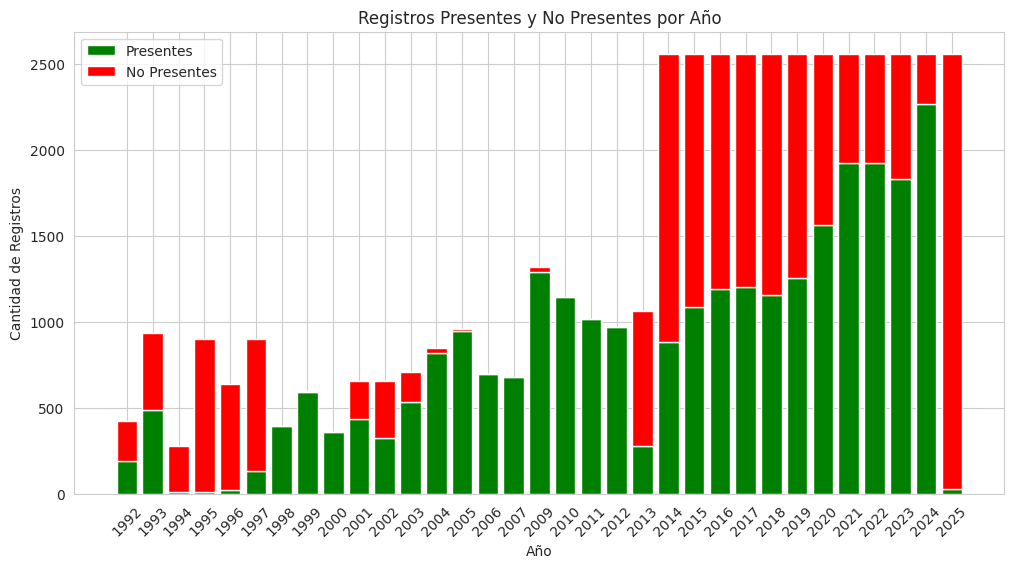

In [9]:
# Paso 10: Crear el gráfico de barras apiladas
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
# Graficar los datos
plt.bar(años, presentes, color='green', label="Presentes")
plt.bar(años, no_presentes, color='red', bottom=presentes, label="No Presentes")

# Personalizar el gráfico
plt.xlabel("Año")
plt.ylabel("Cantidad de Registros")
plt.title("Registros Presentes y No Presentes por Año")
plt.xticks(rotation=45)  # Rotar los años para mejor visibilidad
plt.legend()

# Mostrar el gráfico
plt.show()